In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as soup
from splinter import Browser

In [3]:
# Splinter setup
browser = Browser('chrome', headless=False)

url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [4]:
# Get HTML and parse
html = browser.html
html_soup = soup(html, 'html.parser')

In [5]:
# Get headers using <th> element and store in list
table_headers = [header.text for header in html_soup.find_all('th')]

print(table_headers)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


In [6]:
# Get data using <tr> with 'data-row' class and store in list of lists
table_data = []
data_rows = html_soup.find_all('tr', class_='data-row')

for row in data_rows:
    table_data.append(row.text.strip().split())
    
print(table_data[0], len(table_data), sep='\n')

['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
1867


In [7]:
# Create dataframe
mars_df = pd.DataFrame(table_data, columns=table_headers)

mars_df.head(10)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
5,57,2012-08-21,15,158,6,-78.0,740.0
6,68,2012-08-22,16,158,6,-77.0,740.0
7,79,2012-08-23,17,159,6,-76.0,742.0
8,112,2012-08-27,21,161,6,-74.0,741.0
9,114,2012-08-28,22,162,6,-74.0,742.0


### Meaning of column headings
* id - identification number of transmission from Curiosity (int)
* terrestrial_date - date on Earth (datetime)
* sol - Martian days elapsed since Curiosity landing (int)
* ls - solar longitude (int)
* month - Martian month
* min_temp - minimum temperature in °C in single sol
* pressure - atmospheric pressure

In [8]:
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [9]:
# Convert dtypes
mars_df = mars_df.astype({'id': 'int',
                          'sol': 'int',
                          'ls': 'int',
                          'month': 'int',
                          'min_temp': 'float',
                          'pressure': 'float'})

mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int32         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 73.1 KB


In [10]:
browser.quit()

## How many months exist on Mars?

In [11]:
mars_df['month'].unique()

array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5])

There are 12 months on Mars

## How many Martian (and not Earth) days worth of data exist in the scraped dataset?

In [12]:
# Sols is a Martian day, count sol column for total sols
total_sols = mars_df['sol'].count()

print(total_sols)

1867


There are 1867 sols (Martian day) in the dataset.

## What are the coldest and the warmest months on Mars (at the location of Curiosity)? Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.

In [13]:
# Group by month, aggregrate with mean
temp_by_month = mars_df.groupby('month').mean()['min_temp']

temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

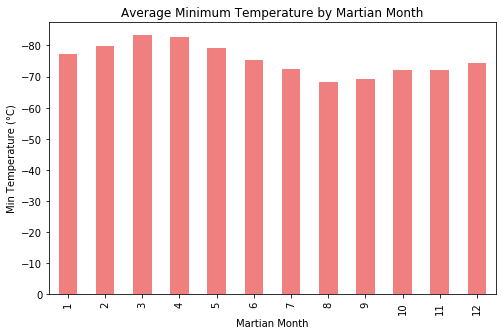

In [17]:
# Plot data with bar chart
temp_month_plot = temp_by_month.plot(kind='bar', figsize=(8, 5),
                                     color='lightcoral')
temp_month_plot.invert_yaxis()
temp_month_plot.set_xlabel('Martian Month')
temp_month_plot.set_ylabel('Min Temperature (°C)')
temp_month_plot.set_title('Average Minimum Temperature by Martian Month')

plt.show()

The 3rd Martian month is the coldest month at -83.3°C.

The 8th Martian month is the warmest month at -68.4°C.

## Which months have the lowest and the highest atmospheric pressure on Mars? Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.

In [15]:
# Groupby 'month', aggregate with average for 'pressure' column
pressure_by_month = mars_df.groupby('month').mean()['pressure']

pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

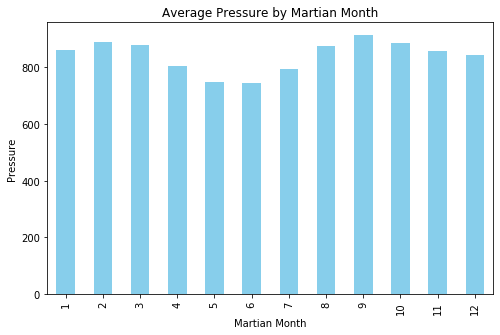

In [20]:
# Plot data with bar chart
pressure_month_plot = pressure_by_month.plot(kind='bar', figsize=(8, 5),
                                     color='skyblue')
pressure_month_plot.set_xlabel('Martian Month')
pressure_month_plot.set_ylabel('Pressure')
pressure_month_plot.set_title('Average Pressure by Martian Month')

plt.show()

The 9th Martian month has the highest atmospheric pressure at 913.3.

The 6th Martian month has the lowest atmosphereic pressure at 745.0.

## About how many terrestrial (Earth) days exist in a Martian year? That is, in the time that Mars circles the Sun once, how many days elapse on Earth? Visually estimate the result by plotting the daily minimum temperature.

In [ ]:
# Solar longitude is 0 to 359 for Mars to circle Sun once

In [16]:
# pd.to_csv('Data/mars_data.csv')